# Genomic analysis of a parasite invasion: colonization of the New World by the blood fluke, Schistosoma mansoni 

Roy Nelson Platt II*, Frédéric D. Chevalier*, Winka Le Clec'h, Marina McDew-White, Philip T. LoVerde, Rafael Ramiro de Assis, Guilherme Oliveira, Safari Kinunghi, Anouk Gouvras, Bonnie Webster, Joanne Webster, Aidan Emery, David Rollinson, Timothy J. Anderson

# Make maps of sample locations

use the `sch_man_nwinvasion-geo_map` conda env

In [1]:
import os
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import numpy as np
import shutil

from IPython.display import Image


import rpy2.ipython


%load_ext rpy2.ipython

os.chdir("/master/nplatt/sch_man_nwinvasion")

In [2]:
if os.path.isdir("results/maps"):
    shutil.rmtree("results/maps")
os.mkdir("results/maps")

# Specimens examined map

In [7]:
pop_colors={}
pop_colors["eafrica"]   = "green"
pop_colors["wafrica"]   = "red"
pop_colors["brazil"]    = "purple"
pop_colors["caribbean"] = "blue"
pop_colors["rodhaini"]  = "darkgrey"

In [9]:
#get coordinates
# data/sampling_lat_lon.csv

# Country Location,Latitude,Longitude
# Senegal,Nder,15.083333,-16.566667
# Senegal,TemeyeS3,16.389444,-15.728889
# Niger,Diambala,14.31376,1.299648
# Niger,Namarigoungou,14.3554,1.2627
# Tanzania,Kigongo,-2.70955,32.89879
# Tanzania,Kabita,-2.31845,33.64372
# Tanzania,Nyamazugo,-2.55731,32.54214
# Tanzania,Katunguru,-2.50537937,32.67316932
# Tanzania,Luchelele,-2.61916,32.8733
# Tanzania,Nyandago,-2.69974,31.85495
# Tanzania,Sekagi,-2.39005,33.09819
# Brazil,Pontos dos Volantes,-16.752778,-41.503889
# Kenya, Nairobi, -1.3011869,36.7906464 
# Uganda,Lake Victoria, 0.0583665,32.4151119,13
# Uganda,Lake Alberta, 1.6738572,31.2493658
# Burundia,,-3.3751268,29.2853413
# Guadeloupe,,16.0102561,-61.7489572
# Puerto Rico,,18.389512,-66.2005625
# Cameroon,,4.036072,9.6717631


sample_sites = np.array([ [15.083333,   -16.566667],
                          [16.389444,   -15.728889],
                          [14.31376,    1.299648],
                          [14.3554,     1.2627],
                          [-2.70955,    32.89879],
                          [-2.31845,    33.64372],
                          [-2.55731,    32.54214],
                          [-2.50537937, 32.67316932],
                          [-2.61916,    32.8733],
                          [-2.69974,    31.85495],
                          [-2.39005,    33.09819],
                          [-16.752778,  -41.503889],
                          [-1.3011869,  36.7906464], 
                          [0.0583665,   32.4151119],
                          [1.6738572,   31.2493658],
                          [-3.3751268,  29.2853413],
                          [16.0102561,  -61.7489572],
                          [18.389512,   -66.2005625],
                          [4.036072,    9.6717631]    ])

lons, lats = sample_sites.T

   
site_colors = [pop_colors["wafrica"],   pop_colors["wafrica"],   pop_colors["wafrica"],  pop_colors["wafrica"], 
               pop_colors["eafrica"],   pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["eafrica"], 
               pop_colors["eafrica"],   pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["brazil"], 
               pop_colors["rodhaini"],  pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["rodhaini"], 
               pop_colors["caribbean"], pop_colors["caribbean"], pop_colors["wafrica"] ] 

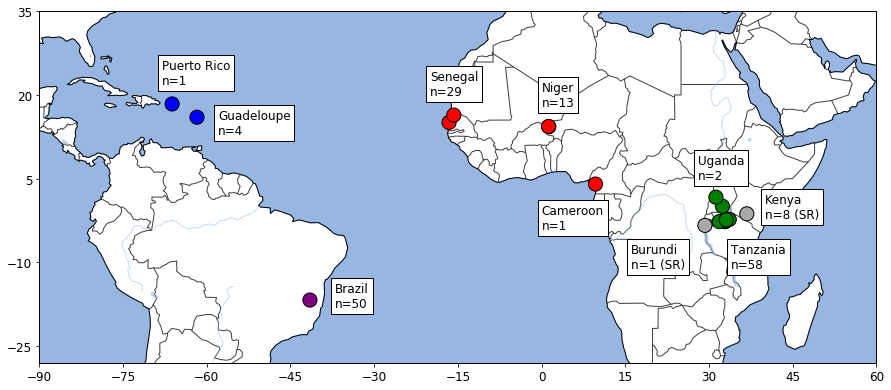

In [14]:
#set fig size
plt.figure(figsize=(15, 15))

#gen axes
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

#draw land features
ax.add_feature(cartopy.feature.LAND, facecolor = "white")
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, alpha = 0.75)
ax.add_feature(cartopy.feature.LAKES, alpha = 0.5)
ax.add_feature(cartopy.feature.RIVERS, alpha = 0.5)

#set lat and long tick marks
lat_ticks = np.arange(-105, 80, 15)
lon_ticks = np.arange(-70,  70, 15)

ax.set_xticks(lat_ticks, crs = ccrs.PlateCarree())
ax.set_yticks(lon_ticks, crs = ccrs.PlateCarree())
plt.tick_params(labelsize = 12)

plt.text(-68, 22,  "Puerto Rico\nn=1",  bbox=dict(facecolor='white'), fontsize=12)
plt.text(-58, 13,  "Guadeloupe\nn=4",   bbox=dict(facecolor='white'), fontsize=12)
plt.text(-37, -18, "Brazil\nn=50",      bbox=dict(facecolor='white'), fontsize=12)
plt.text(-20, 20,  "Senegal\nn=29",     bbox=dict(facecolor='white'), fontsize=12)
plt.text(0,   18,  "Niger\nn=13",       bbox=dict(facecolor='white'), fontsize=12)
plt.text(0,   -4,  "Cameroon\nn=1",     bbox=dict(facecolor='white'), fontsize=12)
plt.text(34,  -11, "Tanzania\nn=58",    bbox=dict(facecolor='white'), fontsize=12)
plt.text(16,  -11, "Burundi\nn=1 (SR)", bbox=dict(facecolor='white'), fontsize=12)
plt.text(28,  5,   "Uganda\nn=2",       bbox=dict(facecolor='white'), fontsize=12)
plt.text(40,  -2,  "Kenya\nn=8 (SR)",   bbox=dict(facecolor='white'), fontsize=12)

#set limits of map
ax.set_extent([-90, 60, -28, 35], crs = ccrs.PlateCarree())

#plot sampling logations
plt.scatter(lats, lons,
            facecolors = site_colors, 
            edgecolors = 'black', 
            linewidth  = 1, 
            marker     = 'o', 
            s          = 200, 
            alpha      = 1,
            transform  = ccrs.PlateCarree(), 
            zorder     = 10 )

plt.savefig("results/maps/world_map.svg", format="svg")
plt.savefig("results/maps/world_map.png", format="png")

plt.show()

# Trade maps

In [24]:
sample_sites = np.array([ [15.083333,   -16.566667],
                          [16.389444,   -15.728889],
                          [14.31376,    1.299648],
                          [14.3554,     1.2627],
                          [-2.70955,    32.89879],
                          [-2.31845,    33.64372],
                          [-2.55731,    32.54214],
                          [-2.50537937, 32.67316932],
                          [-2.61916,    32.8733],
                          [-2.69974,    31.85495],
                          [-2.39005,    33.09819],
                          [-16.752778,  -41.503889],
                          [0.0583665,   32.4151119],
                          [1.6738572,   31.2493658],
                          [16.0102561,  -61.7489572],
                          [18.389512,   -66.2005625],
                          [4.036072,    9.6717631]    ])

lons, lats = sample_sites.T

   
site_colors = [pop_colors["wafrica"],   pop_colors["wafrica"],   pop_colors["wafrica"],  pop_colors["wafrica"], 
               pop_colors["eafrica"],   pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["eafrica"], 
               pop_colors["eafrica"],   pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["brazil"], 
               pop_colors["rodhaini"],  pop_colors["eafrica"],   pop_colors["eafrica"],  pop_colors["rodhaini"], 
               pop_colors["caribbean"], pop_colors["caribbean"], pop_colors["wafrica"] ] 

## Brazil

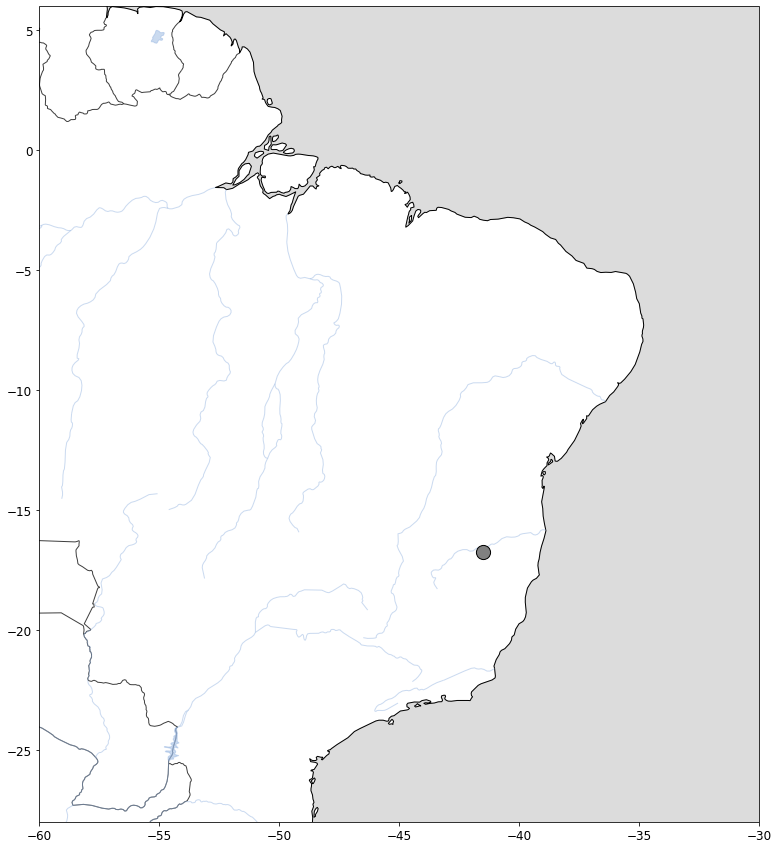

In [18]:
#set fig size
plt.figure(figsize=(15, 15))

#gen axes
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

#draw land features
ax.add_feature(cartopy.feature.LAND, facecolor = "white")
ax.add_feature(cartopy.feature.OCEAN, facecolor= "gainsboro")
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, alpha = 0.75)
ax.add_feature(cartopy.feature.LAKES, alpha = 0.5)
ax.add_feature(cartopy.feature.RIVERS, alpha = 0.5)

#set lat and long tick marks
lat_ticks = np.arange(-105, 80, 5)
lon_ticks = np.arange(-70,  70, 5)

ax.set_xticks(lat_ticks, crs = ccrs.PlateCarree())
ax.set_yticks(lon_ticks, crs = ccrs.PlateCarree())
plt.tick_params(labelsize = 12)

# plt.text(-68, 22,  "Puerto Rico\nn=1",  bbox=dict(facecolor='white'), fontsize=12)
# plt.text(-58, 13,  "Guadeloupe\nn=4",   bbox=dict(facecolor='white'), fontsize=12)
# plt.text(-37, -18, "Brazil\nn=50",      bbox=dict(facecolor='white'), fontsize=12)
# plt.text(-20, 20,  "Senegal\nn=29",     bbox=dict(facecolor='white'), fontsize=12)
# plt.text(0,   18,  "Niger\nn=13",       bbox=dict(facecolor='white'), fontsize=12)
# plt.text(0,   -4,  "Cameroon\nn=1",     bbox=dict(facecolor='white'), fontsize=12)
# plt.text(34,  -11, "Tanzania\nn=58",    bbox=dict(facecolor='white'), fontsize=12)
# plt.text(16,  -11, "Burundi\nn=1 (SR)", bbox=dict(facecolor='white'), fontsize=12)
# plt.text(28,  5,   "Uganda\nn=2",       bbox=dict(facecolor='white'), fontsize=12)
# plt.text(40,  -2,  "Kenya\nn=8 (SR)",   bbox=dict(facecolor='white'), fontsize=12)

#set limits of map
ax.set_extent([-60, -30, -28, 6], crs = ccrs.PlateCarree())

#plot sampling logations
plt.scatter(lats, lons,
            facecolors = "grey", 
            edgecolors = 'black', 
            linewidth  = 1, 
            marker     = 'o', 
            s          = 200, 
            alpha      = 1,
            transform  = ccrs.PlateCarree(), 
            zorder     = 10 )

plt.savefig("results/maps/brazil.svg", format="svg")
plt.savefig("results/maps/brazil.png", format="png")

plt.show()

## Africa

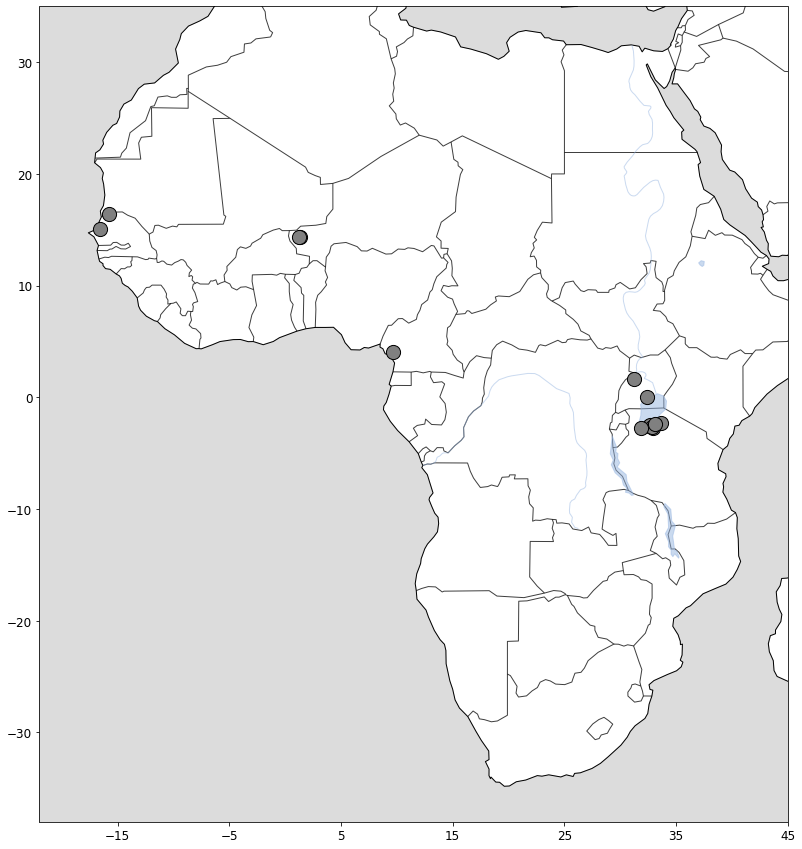

In [28]:
#set fig size
plt.figure(figsize=(15, 15))

#gen axes
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

#draw land features
ax.add_feature(cartopy.feature.LAND, facecolor = "white")
ax.add_feature(cartopy.feature.OCEAN, facecolor= "gainsboro")
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, alpha = 0.75)
ax.add_feature(cartopy.feature.LAKES, alpha = 0.5)
ax.add_feature(cartopy.feature.RIVERS, alpha = 0.5)

#set lat and long tick marks
lat_ticks = np.arange(-105, 80, 10)
lon_ticks = np.arange(-70,  70, 10)

ax.set_xticks(lat_ticks, crs = ccrs.PlateCarree())
ax.set_yticks(lon_ticks, crs = ccrs.PlateCarree())
plt.tick_params(labelsize = 12)

# plt.text(-68, 22,  "Puerto Rico\nn=1",  bbox=dict(facecolor='white'), fontsize=12)
# plt.text(-58, 13,  "Guadeloupe\nn=4",   bbox=dict(facecolor='white'), fontsize=12)
# plt.text(-37, -18, "Brazil\nn=50",      bbox=dict(facecolor='white'), fontsize=12)
# plt.text(-20, 20,  "Senegal\nn=29",     bbox=dict(facecolor='white'), fontsize=12)
# plt.text(0,   18,  "Niger\nn=13",       bbox=dict(facecolor='white'), fontsize=12)
# plt.text(0,   -4,  "Cameroon\nn=1",     bbox=dict(facecolor='white'), fontsize=12)
# plt.text(34,  -11, "Tanzania\nn=58",    bbox=dict(facecolor='white'), fontsize=12)
# plt.text(16,  -11, "Burundi\nn=1 (SR)", bbox=dict(facecolor='white'), fontsize=12)
# plt.text(28,  5,   "Uganda\nn=2",       bbox=dict(facecolor='white'), fontsize=12)
# plt.text(40,  -2,  "Kenya\nn=8 (SR)",   bbox=dict(facecolor='white'), fontsize=12)

#set limits of map
ax.set_extent([-22, 45, -38, 35], crs = ccrs.PlateCarree())

#plot sampling logations
plt.scatter(lats, lons,
            facecolors = "grey", 
            edgecolors = 'black', 
            linewidth  = 1, 
            marker     = 'o', 
            s          = 200, 
            alpha      = 1,
            transform  = ccrs.PlateCarree(), 
            zorder     = 10 )

plt.savefig("results/maps/africa.svg", format="svg")
plt.savefig("results/maps/africa.png", format="png")

plt.show()